## Linear regression

#### 模型

自变量（特征）和因变量（目标）之间的线性关系，找到一条最佳拟合直线（超平面），使预测值与真实值之间的误差最小。

$y = \beta_0 + \beta_1 x_1 + ... +  \beta_n x_{n} + \epsilon$
- $y$：因变量（目标值）
- $x$：自变量（特征）
- $\beta_0$：截距
- $\beta_i$：斜率
- $\epsilon$：误差项

#### 目标
通过最小化**损失函数**（通常是均方误差，MSE）来找到最佳的模型参数（$\beta_0, \beta_1, \dots, \beta_n$）。

损失函数MSE：
$\text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2$
其中：
- $y_i$:真实值
- $\hat{y}_i$:预测值
- $m$:样本数量

#### 参数求解
- **最小二乘**：直接求解。
- **梯度下降**：迭代优化，逐步调整参数，使损失函数最小化。

### 实现

intercept(β_0): [3.76859264]
slope(β_1): [[3.03767628]]
MSE: 0.968726724854242
R^2: 0.9670981078945785


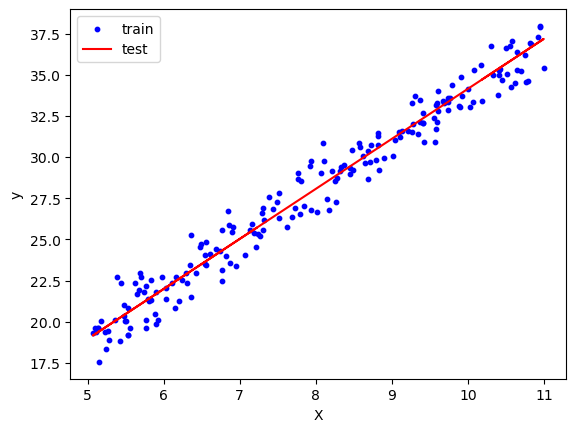

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # 划分训练集和测试集
from sklearn.metrics import mean_squared_error, r2_score # 均方误差

np.random.seed(111)
X = 5 + 6 * np.random.rand(1000, 1)  # 生成100个随机特征值
y = 4 + 3 * X + np.random.randn(1000, 1)  # 生成目标值，加入噪声

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 划分训练集和测试集 8-2
model = LinearRegression() # 创建模型
model.fit(X_train, y_train) # 训练
y_pred = model.predict(X_test) # 预测

print("intercept(β_0):", model.intercept_)
print("slope(β_1):", model.coef_)

# 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

plt.scatter(X_test, y_test, color='blue', s=10, label="train")
plt.plot(X_test, y_pred, color='red', label="test")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#### 备注
1. **线性假设**：假设了自变量和因变量之间存在线性关系。
2. **多重共线性**：自变量之间高度相关--->模型可能不稳定。
3. **异常值敏感**：进行数据清洗。
4. **过拟合**：特征过多，模型可能过拟合---->正则化（e.g.岭回归、Lasso回归）

#### Notation
m = Number of training examples

x = input features

y = output target variable

(x,y) -- a training example

**h** = hypothesis [x-->y]

**training set**

#### Cost function/Square error function

#### Gradient descent
start with some $\theta_0$, $\theta_1$...
keep changing them
find the right direction to minimize the cost funtion
$\alpha$ = learning rate
**simultaneously** update all theta

## Logistic Regression ---Classification

预测一个样本属于某个类别的概率（输出在0到1之间）
Idea: 在线性回归的基础上，通过一个激活函数（如Sigmoid）将线性结果映射到概率。
predicts the probability of an outcome that can take only two values.
logistic function——sigmoid function, to model the probability of the default class.

### Hypothesis

#### Hypothesis Function

$h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$
- $\theta^T x$：特征的线性组合（\(\theta\)为权重参数，\(x\)为特征向量）。
- **Sigmoid函数**：
  $\sigma(z) = \frac{1}{1 + e^{-z}}$

分类决策：- 若 $h_\theta(x) \geq 0.5$，预测为类别1；否则为类别0。

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Loss Function

使用**对数损失（交叉熵损失）**：
$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$

不用均方误差（MSE）： 非凸优化问题，难以找到全局最优解。

to minimize the loss function
by increasing/decreasing the weights, i.e. fitting them. 
* How do we know what parameters should be biggers and what parameters should be smallers? *
    ——>the derivative of the loss function with respect to each weight.
    It tells us how loss would change if we modified the parameters.

In [2]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean

"""
    J(θ) = (1/m) * Σ [ -y * log(hθ(x)) - (1 - y) * log(1 - hθ(x)) ]
"""

#### Gradient descent
    updating the weights

$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $
- $\alpha$：learning rate

### Predictions

In [ ]:
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))
def predict(X, theta, threshold=0.5):
    return predict_probs(X, theta) >= threshold

Iteration 0: loss = 0.6931471805599454
Iteration 10000: loss = 0.03432808634642346
Iteration 20000: loss = 0.028787025832133443
Iteration 30000: loss = 0.02571880776427716
Iteration 40000: loss = 0.023408635212947157
Iteration 50000: loss = 0.021507199017176976
Iteration 60000: loss = 0.01989251759083061
Iteration 70000: loss = 0.018503295528766978
Iteration 80000: loss = 0.01729930580707021
Iteration 90000: loss = 0.016249836794914506
Iteration 100000: loss = 0.01532992472335979
Iteration 110000: loss = 0.014518909844335945
Iteration 120000: loss = 0.013799672865938858
Iteration 130000: loss = 0.013158067641994314
Iteration 140000: loss = 0.012582429565328922
Iteration 150000: loss = 0.012063141842400461
Iteration 160000: loss = 0.011592261833140816
Iteration 170000: loss = 0.011163207785515782
Iteration 180000: loss = 0.010770501660660396
Iteration 190000: loss = 0.010409560916002642
Iteration 200000: loss = 0.010076531270872697
Iteration 210000: loss = 0.009768152873869894
Iteration

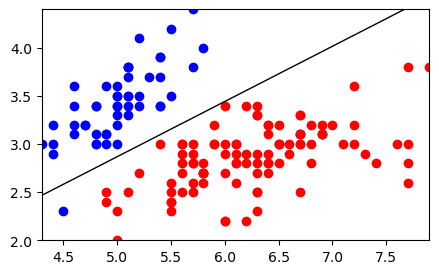

In [12]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose 
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if self.verbose and i % 10000 == 0:
                print(f'Iteration {i}: loss = {self.__loss(h, y)}')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5): 
        return self.predict_prob(X) >= threshold

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)
model.fit(X, y)
preds = model.predict(X) 

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="b", label="0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="r", label="1")
(x1_min, x1_max) = (X[:, 0].min(), X[:, 0].max())
(x2_min, x2_max) = (X[:, 1].min(), X[:, 1].max())
(xx1, xx2) = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) #linspace生成网格坐标点,meshgrid将两个一维数组转换为二维网格坐标矩阵
grid = np.c_[xx1.ravel(), xx2.ravel()] #按列合并两个数组，生成形如 [(x1,y1), (x2,y2)...] 的坐标点数组,得到一个包含所有网格点的二维数组，用于模型预测
probs = predict_prob(grid).reshape(xx1.shape) #预测每个网格点的分类概率,得到一个二维概率矩阵，每个元素对应网格点的预测概率
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors="black") 
# 使用等高线绘制函数，在概率值为0.5的位置绘制分界线
# probs: 对应位置的预测概率,[0.5]: 指定要绘制的等高线级别（决策边界对应50%概率阈值）

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X: feature matrix  y: target matrix
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

准确率: 1.0


loss: 0.6101032138557548 	
loss: 0.31645712734198894 	
loss: 0.2194958258652945 	
loss: 0.1732049932127194 	
loss: 0.1460709928785629 	
loss: 0.12815861543322357 	
loss: 0.11539614644446695 	
loss: 0.10580937413397784 	
loss: 0.09832410997287289 	
loss: 0.09230481639365432 	
loss: 0.08735080774785456 	
loss: 0.08319654859365934 	
loss: 0.07965885654559217 	
loss: 0.07660711657949613 	
loss: 0.07394558465529442 	
loss: 0.07160241047709139 	
loss: 0.06952257502655086 	
loss: 0.06766320226584556 	
loss: 0.06599036125310746 	
loss: 0.06447683240746985 	
loss: 0.063100514153438 	
loss: 0.06184326494860729 	
loss: 0.060690047549507777 	
loss: 0.05962828704460288 	
loss: 0.05864738265136908 	
loss: 0.057738331821157465 	
loss: 0.05689343752344646 	
loss: 0.05610607792626418 	
loss: 0.055370523433691025 	
loss: 0.054681790056115766 	
loss: 0.05403552093480196 	
loss: 0.053427889886078585 	
loss: 0.05285552231600889 	
loss: 0.05231542994836062 	
loss: 0.05180495661980631 	
loss: 0.0513217330046

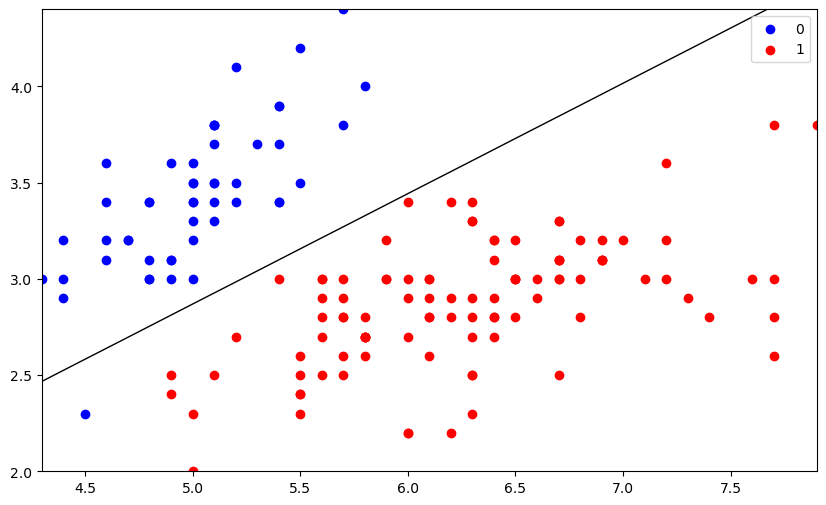

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

def sigmoid_function(z: float | np.ndarray) -> float | np.ndarray:
    return 1 / (1 + np.exp(-z))

def cost_function(h: np.ndarray, y: np.ndarray) -> float: # the error between predicted and expected values
    return float((-y * np.log(h) - (1 - y) * np.log(1 - h)).mean())

def log_likelihood(x, y, weights):
    scores = np.dot(x, weights)
    return np.sum(y * scores - np.log(1 + np.exp(scores)))

def logistic_reg(alpha, x, y, max_iterations=70000):
    theta = np.zeros(x.shape[1])

    for iterations in range(max_iterations):
        z = np.dot(x, theta)
        h = sigmoid_function(z)
        gradient = np.dot(x.T, h - y) / y.size
        theta = theta - alpha * gradient  # updating the weights
        z = np.dot(x, theta)
        h = sigmoid_function(z)
        j = cost_function(h, y)
        if iterations % 100 == 0:
            print(f"loss: {j} \t")  # printing the loss after every 100 iterations
    return theta

if __name__ == "__main__":
    import doctest
    doctest.testmod()

    iris = datasets.load_iris()
    x = iris.data[:, :2]
    y = (iris.target != 0) * 1

    alpha = 0.1
    theta = logistic_reg(alpha, x, y, max_iterations=70000)
    print("theta: ", theta)  # printing the theta i.e weights vector

    def predict_prob(x):
        return sigmoid_function(
            np.dot(x, theta)
        )  # predicting the value of probability from the logistic regression algorithm

    plt.figure(figsize=(10, 6))
    plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color="b", label="0")
    plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="r", label="1")
    (x1_min, x1_max) = (x[:, 0].min(), x[:, 0].max())
    (x2_min, x2_max) = (x[:, 1].min(), x[:, 1].max())
    (xx1, xx2) = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors="black")

    plt.legend()
    plt.show()